Urban cities had the largest percentage of total rides.
Urban cities had the largest percentage of drivers.
Urban cities have the highest percentage of total fares at 49%

In [112]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [113]:
city_data = os.path.join('raw_data', 'city_data.csv')

city_data_df = pd.read_csv(city_data)

city_data_df.head()



city  driver_count   type
0   Richardfort            38  Urban
1  Williamsstad            59  Urban
2   Port Angela            67  Urban
3    Rodneyfort            34  Urban
4   West Robert            39  Urban

In [114]:
ride_data = os.path.join('raw_data', 'ride_data.csv')

ride_data_df = pd.read_csv(ride_data)

ride_data_df.head()





city                 date   fare        ride_id
0  Lake Jonathanshire  2018-01-14 10:14:22  13.83  5739410935873
1  South Michelleport  2018-03-04 18:24:09  30.24  2343912425577
2  Port Samanthamouth  2018-02-24 04:29:00  33.44  2005065760003
3          Rodneyfort  2018-02-10 23:22:03  23.44  5149245426178
4          South Jack  2018-03-06 04:28:35  34.58  3908451377344

In [115]:
#merge the two files together 

merge_table = pd.merge(city_data_df, ride_data_df, on="city")

merge_table.head()

city  driver_count   type                 date   fare        ride_id
0  Richardfort            38  Urban  2018-02-24 08:40:38  13.93  5628545007794
1  Richardfort            38  Urban  2018-02-13 12:46:07  14.00   910050116494
2  Richardfort            38  Urban  2018-02-16 13:52:19  17.92   820639054416
3  Richardfort            38  Urban  2018-02-01 20:18:28  10.26  9554935945413
4  Richardfort            38  Urban  2018-04-17 02:26:37  23.00   720020655850

In [116]:
per_city = merge_table.groupby('city')

# Average Fare ($) Per City
avg_fare = per_city.mean()['fare']

avg_fare.head()

city
Amandaburgh      24.641667
Barajasview      25.332273
Barronchester    36.422500
Bethanyland      32.956111
Bradshawfurt     40.064000
Name: fare, dtype: float64

In [117]:
#Total Number of Rides Per City
total_rides= per_city.count()['ride_id']

total_rides.head()

city
Amandaburgh      18
Barajasview      22
Barronchester    16
Bethanyland      18
Bradshawfurt     10
Name: ride_id, dtype: int64

In [118]:
# Total Number of Drivers Per City
total_drivers = per_city.count()['driver_count']

total_drivers.head()

city
Amandaburgh      18
Barajasview      22
Barronchester    16
Bethanyland      18
Bradshawfurt     10
Name: driver_count, dtype: int64

In [119]:
# City Type (Urban, Suburban, Rural)
city_type = city_data_df.set_index('city')['type']

city_type.head()

city
Richardfort     Urban
Williamsstad    Urban
Port Angela     Urban
Rodneyfort      Urban
West Robert     Urban
Name: type, dtype: object

In [120]:
city_rider = pd.DataFrame({"Average fare":avg_fare, 
                          "Total number of Riders":total_rides,
                          "Total number of Drivers":total_drivers,
                         "Type of city":city_type })

city_rider.head()

Average fare  Total number of Drivers  Total number of Riders  \
Amandaburgh       24.641667                       18                      18   
Barajasview       25.332273                       22                      22   
Barronchester     36.422500                       16                      16   
Bethanyland       32.956111                       18                      18   
Bradshawfurt      40.064000                       10                      10   

              Type of city  
Amandaburgh          Urban  
Barajasview          Urban  
Barronchester     Suburban  
Bethanyland       Suburban  
Bradshawfurt         Rural

In [121]:
#seperating the cities 
rural= city_rider[city_rider['Type of city']=='Rural']

urban = city_rider[city_rider['Type of city']=='Urban']

suburban= city_rider[city_rider['Type of city']=='Suburban']

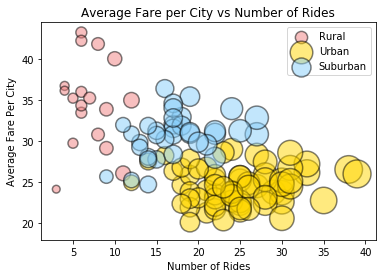

In [122]:

#Rural bubble graph
plt.scatter(rural["Total number of Riders"], 
            rural["Average fare"], 
            color = "lightcoral", 
            edgecolors = "black", 
            s = rural["Total number of Drivers"]*20, 
            label = "Rural", alpha = 0.5, linewidth = 1.5)

#Urban bubble graph
plt.scatter(urban["Total number of Riders"], 
            urban["Average fare"], 
            color = "gold", 
            edgecolors="black", 
            s = urban["Total number of Drivers"]*20, 
            label = "Urban", alpha = 0.5, linewidth = 1.5)

#Suburban bubble graph
plt.scatter(suburban["Total number of Riders"], 
            suburban["Average fare"], 
            color = "lightskyblue", 
            edgecolors ="black", 
            s = suburban["Total number of Drivers"]*20, 
            label = "Suburban", alpha = 0.5, linewidth = 1.5)


#Add title, x axis label and y axis label.
plt.title("Average Fare per City vs Number of Rides")
plt.xlabel("Number of Rides")
plt.ylabel("Average Fare Per City")



# the legend.
plt.legend(loc= "upper right")

plt.show()

In [123]:
 # of Total Fares by City Type
total_fare = city_rider.groupby(["Type of city"])["Average fare"].sum()
    
total_fare

Type of city
Rural        623.479771
Suburban    1106.542729
Urban       1616.942033
Name: Average fare, dtype: float64

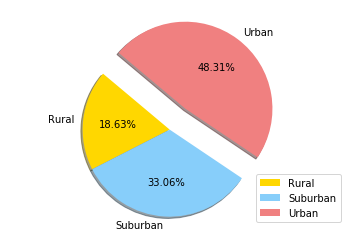

In [124]:
colors = ["gold","lightskyblue","lightcoral"]

explode = (0,0,0.3)



plt.pie(total_fare, 
        labels = total_fare.index, 
        autopct = "%1.2f%%", 
        colors = colors, 
        explode = explode, 
        shadow = True, startangle = 140)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

#Add the legend.
plt.legend(loc = "lower right")

plt.show()

<function matplotlib.pyplot.show>

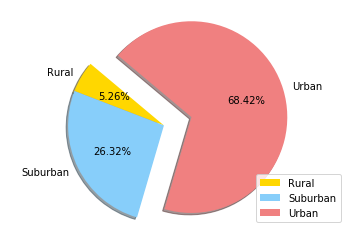

In [125]:
#% of Total Rides by City Type
total_rides = city_rider.groupby(["Type of city"])["Total number of Riders"].sum()

explode = (0,0,0.3)



plt.pie(total_rides, 
        labels = total_rides.index, 
        autopct = "%1.2f%%", 
        colors = colors, 
        explode = explode, 
        shadow = True, startangle = 140)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

#Add the legend.
plt.legend(loc = "lower right")

plt.show

<function matplotlib.pyplot.show>

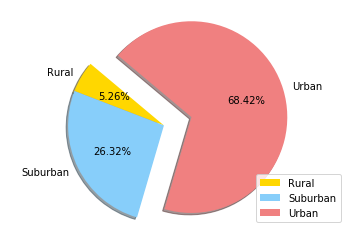

In [126]:
#% of Total Drivers by City Type
total_drivers = city_rider.groupby(["Type of city"])["Total number of Drivers"].sum()

explode = (0,0,0.3)


#the pie chart for total drivers
plt.pie(total_drivers, 
        labels = total_drivers.index, 
        autopct = "%1.2f%%", 
        colors = colors, 
        explode = explode, 
        shadow = True, startangle = 140)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

#Add the legend.
plt.legend(loc = "lower right")

plt.show

